In [1]:
from torchvision.datasets.utils import download_url

# Downloading The dataset

In [2]:
DATASET_URL = "https://gist.github.com/BirajCoder/5f068dfe759c1ea6bdfce9535acdb72d/raw/c84d84e3c80f93be67f6c069cbdc0195ec36acbd/insurance.csv"
DATA_FILENAME = "T05_Insurance.csv"
download_url(DATASET_URL, './dataset', DATA_FILENAME)

Using downloaded and verified file: ./dataset\T05_Insurance.csv


using pandas to read the dataset

In [3]:
import pandas as pd

Reading Dataset

In [4]:
dataset = pd.read_csv("dataset/T05_Insurance.csv")

In [5]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
dataset.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
len(dataset.columns)

7

In [8]:
len(dataset) # way to take out the number of rows

1338

In [9]:
type(dataset)

pandas.core.frame.DataFrame

In [10]:
dataset.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [11]:
dataset.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [12]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
# there is no use to know the region, as the insurance won't depened on region, it's depend on health
dataset.drop(["region"], axis=1, inplace=True)

In [14]:
dataset # now our main dataset got change, as we have used inplace=True while droping

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


One Hot Encoding For Cotegorical column

In [15]:
categorical_cols = ["sex", "smoker"]

In [16]:
output_cols = ["charges"]
input_cols = ["age", "sex", "bmi", "children", "smoker"]

In [17]:
def dataframe_to_arrays(dataframe):
    dataframe1 = dataframe.copy(deep=True)
    for col in categorical_cols: # this is ordinal encoding
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array
# doing ordinal encoding here, will not matter, bcz the categorical data we have is of two categories only

In [18]:
inputs_array, targets_array = dataframe_to_arrays(dataset)
inputs_array.shape, targets_array.shape

((1338, 5), (1338, 1))

In [19]:
inputs_array, targets_array

(array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ],
        [18.  ,  1.  , 33.77,  1.  ,  0.  ],
        [28.  ,  1.  , 33.  ,  3.  ,  0.  ],
        ...,
        [18.  ,  0.  , 36.85,  0.  ,  0.  ],
        [21.  ,  0.  , 25.8 ,  0.  ,  0.  ],
        [61.  ,  0.  , 29.07,  0.  ,  1.  ]]),
 array([[16884.924 ],
        [ 1725.5523],
        [ 4449.462 ],
        ...,
        [ 1629.8335],
        [ 2007.945 ],
        [29141.3603]]))

In [20]:
inputs_array.dtype, targets_array.dtype

(dtype('float64'), dtype('float64'))

In [21]:
type(inputs_array), type(targets_array)

(numpy.ndarray, numpy.ndarray)

In [28]:
def dataframe_to_arrays(dataframe):
    # Make a copy of the original dataframe
    dataframe1 = dataframe.copy(deep=True)
    # Convert non-numeric categorical columns to numbers
    for col in categorical_cols:
        dataframe1[col] = dataframe1[col].astype('category').cat.codes
    # Extract input & outupts as numpy arrays
    inputs_array = dataframe1[input_cols].to_numpy()
    targets_array = dataframe1[output_cols].to_numpy()
    return inputs_array, targets_array

In [30]:
inputs_array, targets_array = dataframe_to_arrays(dataset)
inputs_array, targets_array

(array([[19.  ,  0.  , 27.9 ,  0.  ,  1.  ],
        [18.  ,  1.  , 33.77,  1.  ,  0.  ],
        [28.  ,  1.  , 33.  ,  3.  ,  0.  ],
        ...,
        [18.  ,  0.  , 36.85,  0.  ,  0.  ],
        [21.  ,  0.  , 25.8 ,  0.  ,  0.  ],
        [61.  ,  0.  , 29.07,  0.  ,  1.  ]]),
 array([[16884.924 ],
        [ 1725.5523],
        [ 4449.462 ],
        ...,
        [ 1629.8335],
        [ 2007.945 ],
        [29141.3603]]))

In [31]:
inputs = torch.tensor(inputs_array)
targets = torch.tensor(targets_array)

In [32]:
inputs.dtype, targets.dtype

(torch.float64, torch.float64)

In [33]:
from torch.utils.data import DataLoader, TensorDataset, random_split

In [34]:
dataset = TensorDataset(inputs, targets)

In [35]:
train_ds, val_ds, test_ds = random_split(dataset, [1000, 300, 38])

In [36]:
batch_size = 20
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [37]:
for xb, yb in train_loader:
    print("inputs:", xb)
    print("targets:", yb)
    break

inputs: tensor([[45.0000,  1.0000, 33.7000,  1.0000,  0.0000],
        [19.0000,  1.0000, 35.5300,  0.0000,  0.0000],
        [43.0000,  0.0000, 25.0800,  0.0000,  0.0000],
        [38.0000,  0.0000, 27.8350,  2.0000,  0.0000],
        [39.0000,  0.0000, 24.2250,  5.0000,  0.0000],
        [61.0000,  0.0000, 33.3300,  4.0000,  0.0000],
        [37.0000,  0.0000, 29.5000,  2.0000,  0.0000],
        [58.0000,  0.0000, 32.9650,  0.0000,  0.0000],
        [39.0000,  0.0000, 32.5000,  1.0000,  0.0000],
        [43.0000,  1.0000, 25.5200,  5.0000,  0.0000],
        [23.0000,  1.0000, 41.9100,  0.0000,  0.0000],
        [61.0000,  0.0000, 22.0400,  0.0000,  0.0000],
        [18.0000,  0.0000, 40.2800,  0.0000,  0.0000],
        [49.0000,  0.0000, 31.9000,  5.0000,  0.0000],
        [52.0000,  0.0000, 25.3000,  2.0000,  1.0000],
        [41.0000,  0.0000, 31.6000,  0.0000,  0.0000],
        [32.0000,  1.0000, 27.8350,  1.0000,  0.0000],
        [54.0000,  0.0000, 30.8000,  3.0000,  0.0000],
  

# Model

Importing linear function to train the model

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [25]:
torch.set_default_dtype(torch.float64)

In [50]:
losslist=[]

In [51]:
class InsuranceModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(5, 1)
        self.history = []
    
    def prediction(self, inputs):
        return self.linear(inputs)
    
    def lossCal(self, batch):
        inputs, targets = batch
        pred = self.prediction(inputs)
        loss = F.mse_loss(pred, targets)
        return loss
    
    def validation_step(self, batch): # this will be given at validation phase.
        inputs, targets = batch
        loss = self.lossCal(batch)
        return {'val_loss': loss.detach()}
    
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        return {'val_loss': epoch_loss.item()}
    
    def evaluate(self, val_loader):
        outputs = [self.validation_step(batch) for batch in val_loader]
        return self.validation_epoch_end(outputs)
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch, result['val_loss']))
        
    
    def training_(self, epochs, lr, train_loader, val_loader, opt_func=torch.optim.SGD):
        optimizer = opt_func(self.linear.parameters(), lr)
        
        for epoch in range(epochs):
            
            # training phase
            for batch in train_loader:
                loss = self.lossCal(batch)
                losslist.append(loss.item())
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                
            
            # validation phase
            result = self.evaluate(val_loader)
            self.epoch_end(epoch, result)
            self.history.append(result)
        
        return self.history     

In [52]:
model = InsuranceModel()

In [53]:
model.training_(10, 0.0001, train_loader, val_loader)

Epoch [0], val_loss: 150526424.8613
Epoch [1], val_loss: 157808008.8448
Epoch [2], val_loss: 151112433.2000
Epoch [3], val_loss: 149101609.6262
Epoch [4], val_loss: 149395915.5017
Epoch [5], val_loss: 149931426.0163
Epoch [6], val_loss: 167057811.4250
Epoch [7], val_loss: 155441620.2295
Epoch [8], val_loss: 151997034.1341
Epoch [9], val_loss: 159086783.5187


[{'val_loss': 150526424.86132288},
 {'val_loss': 157808008.84484753},
 {'val_loss': 151112433.20004812},
 {'val_loss': 149101609.62616676},
 {'val_loss': 149395915.50169942},
 {'val_loss': 149931426.01631975},
 {'val_loss': 167057811.42504847},
 {'val_loss': 155441620.22953847},
 {'val_loss': 151997034.13413286},
 {'val_loss': 159086783.51869106}]

In [49]:
import matplotlib.pyplot as plt

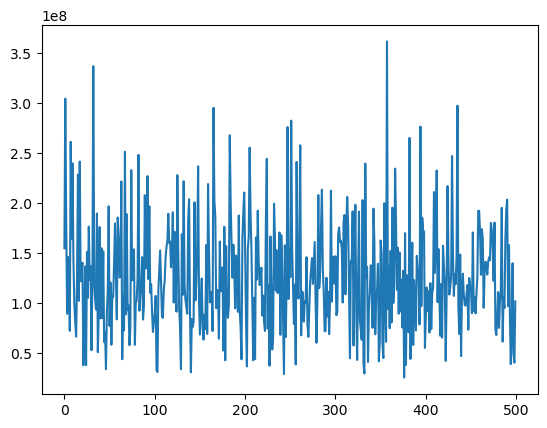

In [55]:
plt.plot(losslist)
plt.show()